## Titanic Dataset Analysis from Kaggle
data : [link to titanic dataset at Kaggle](https://www.kaggle.com/competitions/titanic/data?select=test.csv)

## Objective: Predict if the person will survive or not on the Titanic

## Overview

1) Feature treatment

2) Exploratory data analysis(EDA)

3) Feature Engineering

4) NaN values treat

5) Baseline model

6) Tuning models Hyperparameters

7) Ensemble models

8) Result

In [1]:
import pandas as pd

In [2]:
## Dataset Reading
train_data = pd.read_csv('../kaggle_datasets/titanic_train.csv')
test_data = pd.read_csv('../kaggle_datasets/titanic_test.csv')

## Verifying data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Verifying NaN values, and data types

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


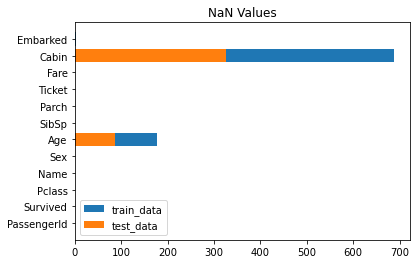

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title('NaN Values')
plt.barh(y=train_data.columns, data=train_data, width=train_data.isna().sum(),label='train_data')
plt.barh(y=test_data.columns, data=test_data, width=test_data.isna().sum(),label='test_data')
plt.legend()

## I chose to drop the column Cabin because it have more than 75% of NaN values, and treat could give bias to the feature.

In [8]:
train_data_clean = train_data.drop(columns='Cabin')
test_data_clean = test_data.drop(columns='Cabin')

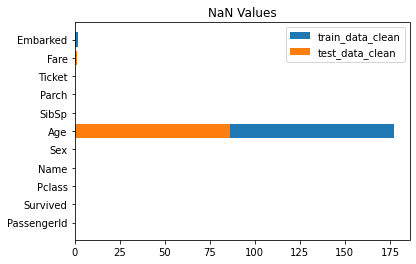

In [9]:
plt.title('NaN Values')
plt.barh(y=train_data_clean.columns, 
         data=train_data_clean, 
         width=train_data_clean.isna().sum(),
         label='train_data_clean')
plt.barh(y=test_data_clean.columns, 
         data=test_data_clean, 
         width=test_data_clean.isna().sum(),
         label='test_data_clean')
plt.legend()

## Looking for correlations, and data statistics

In [10]:
train_data_clean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test_data_clean.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:>

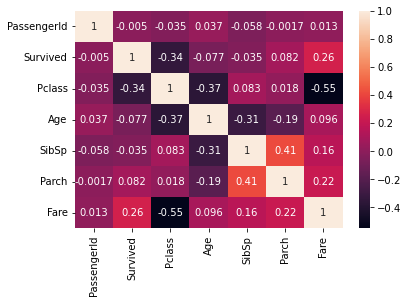

In [12]:
import numpy as np
sns.heatmap(data=train_data_clean.select_dtypes(np.number).corr(), annot=True)

In [13]:
train_data_clean.select_dtypes(np.number).corr().abs().sort_values(by='Survived')['Survived']

# Pclass, and Fare are the features that is more correlated to the target.
# Those targets are related to how much money the passenger have.

PassengerId    0.005007
SibSp          0.035322
Age            0.077221
Parch          0.081629
Fare           0.257307
Pclass         0.338481
Survived       1.000000
Name: Survived, dtype: float64

## Verifying Pclass with Age, SibSp and Parch influence over the target, and others EDA

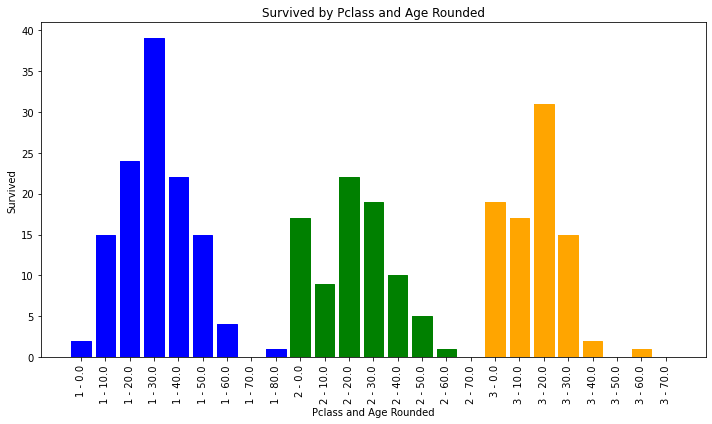

In [14]:
# Rounding Age column

train_data_clean['Age_Rounded'] = (train_data_clean['Age'] // 10) * 10

# Group by Pclass and Age_Rounded, counting target positive values
grouped_data = train_data_clean.groupby(['Pclass', 'Age_Rounded'])['Survived'].sum().reset_index()

class_colors = {1: 'blue', 2: 'green', 3: 'orange'}


plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['Survived'], 
        tick_label=grouped_data['Pclass'].astype(str) + ' - ' + grouped_data['Age_Rounded'].astype(str))
bars = plt.bar(grouped_data.index, grouped_data['Survived'], tick_label=grouped_data['Pclass'].astype(str) + ' - ' + grouped_data['Age_Rounded'].astype(str))
legend_labels = []
for i, bar in enumerate(bars):
    pclass = grouped_data.loc[i, 'Pclass']
    bar.set_color(class_colors[pclass])
    if pclass not in legend_labels:
        legend_labels.append(pclass)
plt.xlabel('Pclass and Age Rounded')
plt.ylabel('Survived')
plt.title('Survived by Pclass and Age Rounded')
plt.xticks(rotation=90)
plt.tight_layout()


plt.show()

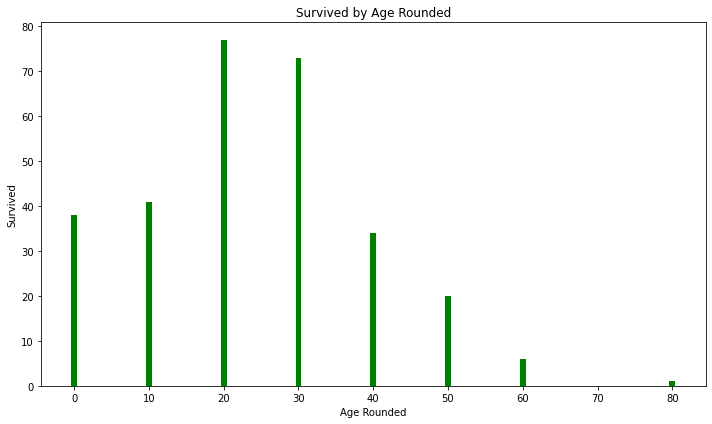

In [15]:
grouped_data = train_data_clean.groupby('Age_Rounded')['Survived'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Age_Rounded'], grouped_data['Survived'], color='green')
plt.xlabel('Age Rounded')
plt.ylabel('Survived')
plt.title('Survived by Age Rounded')
plt.xticks(np.unique(grouped_data['Age_Rounded']))
plt.tight_layout()

plt.show()

# People between 15 and 35 years old were more likely to survive.

No handles with labels found to put in legend.


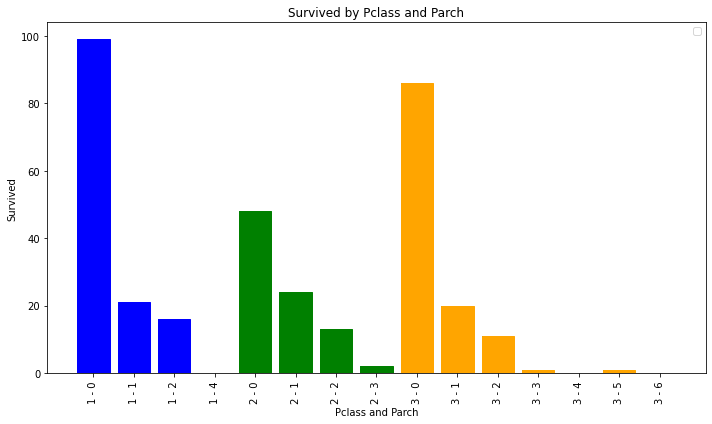

In [16]:
# Group by Pclass and Age_Rounded, counting target positive values
grouped_data = train_data_clean.groupby(['Pclass', 'Parch'])['Survived'].sum().reset_index()

class_colors = {1: 'blue', 2: 'green', 3: 'orange'}


plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['Survived'], 
        tick_label=grouped_data['Pclass'].astype(str) + ' - ' + grouped_data['Parch'].astype(str))
bars = plt.bar(grouped_data.index, grouped_data['Survived'], tick_label=grouped_data['Pclass'].astype(str) + ' - ' + grouped_data['Parch'].astype(str))
legend_labels = []
for i, bar in enumerate(bars):
    pclass = grouped_data.loc[i, 'Pclass']
    bar.set_color(class_colors[pclass])
    if pclass not in legend_labels:
        legend_labels.append(pclass)
plt.xlabel('Pclass and Parch')
plt.ylabel('Survived')
plt.title('Survived by Pclass and Parch')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

# People with Parch=0 were more likely to survive.

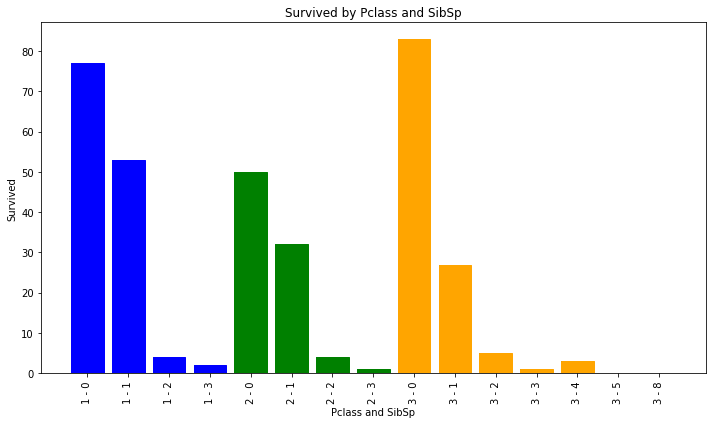

In [17]:
# Group by Pclass and Age_Rounded, counting target positive values
grouped_data = train_data_clean.groupby(['Pclass', 'SibSp'])['Survived'].sum().reset_index()

class_colors = {1: 'blue', 2: 'green', 3: 'orange'}


plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['Survived'], 
        tick_label=grouped_data['Pclass'].astype(str) + ' - ' + grouped_data['SibSp'].astype(str))
bars = plt.bar(grouped_data.index, grouped_data['Survived'], tick_label=grouped_data['Pclass'].astype(str) + ' - ' + grouped_data['SibSp'].astype(str))
legend_labels = []
for i, bar in enumerate(bars):
    pclass = grouped_data.loc[i, 'Pclass']
    bar.set_color(class_colors[pclass])
    if pclass not in legend_labels:
        legend_labels.append(pclass)
plt.xlabel('Pclass and SibSp')
plt.ylabel('Survived')
plt.title('Survived by Pclass and SibSp')
plt.xticks(rotation=90)
plt.tight_layout()


plt.show()

# People with SibSp=0 were more likely to survive.

In [18]:
train_data_clean.groupby(['Sex'])['Survived'].sum()

# Women were more likely to survive.

Sex
female    233
male      109
Name: Survived, dtype: int64

In [19]:
train_data_clean.groupby(['Pclass'])['Survived'].sum()

# People from 1st class were likely to survive.

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

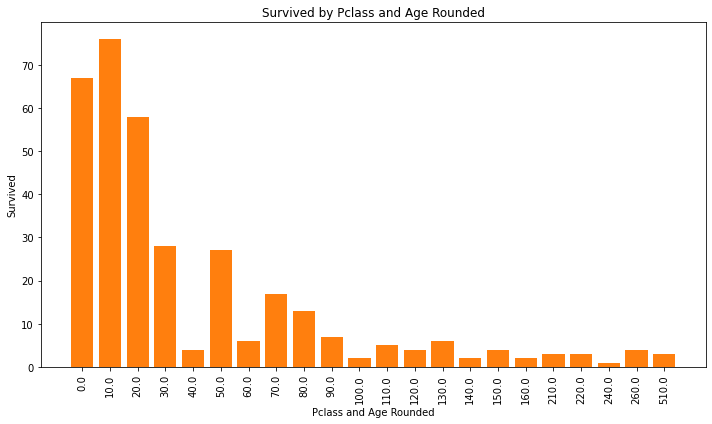

In [20]:
# Rounding Fare column

train_data_clean['Fare_Rounded'] = (train_data_clean['Fare'] // 10) * 10

# Group by Fare_Rounded, counting target positive values
grouped_data = train_data_clean.groupby(['Fare_Rounded'])['Survived'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['Survived'], 
        tick_label=grouped_data['Fare_Rounded'].astype(str))
bars = plt.bar(grouped_data.index, grouped_data['Survived'], tick_label=grouped_data['Fare_Rounded'].astype(str))
plt.xlabel('Pclass and Age Rounded')
plt.ylabel('Survived')
plt.title('Survived by Pclass and Age Rounded')
plt.xticks(rotation=90)
plt.tight_layout()


plt.show()
# people that paid less Fare, had more chance to survive.

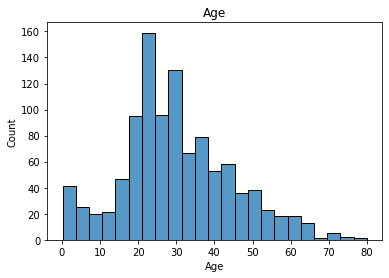

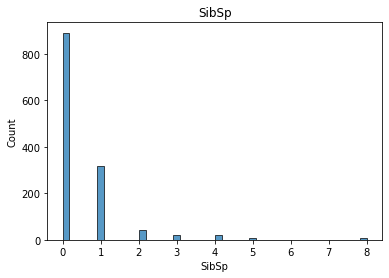

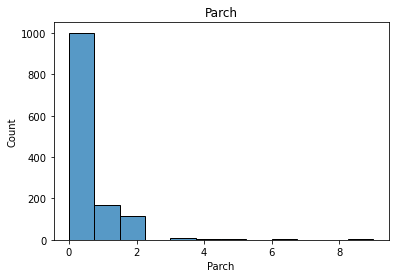

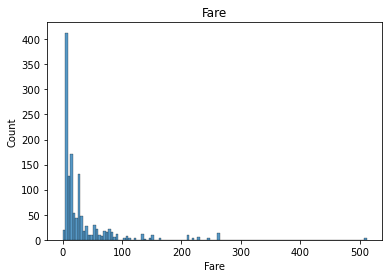

In [21]:
data = pd.concat([train_data_clean,test_data_clean])

data_num = data[['Age','SibSp','Parch','Fare']]
data_cat = data[['Survived','Pclass','Sex','Ticket','Embarked']]
for i in data_num.columns:
    sns.histplot(data_num[i])
    plt.title(i)
    plt.show()

## Looking at histograms, normalizing data could be necessary

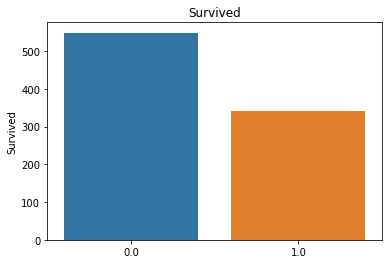

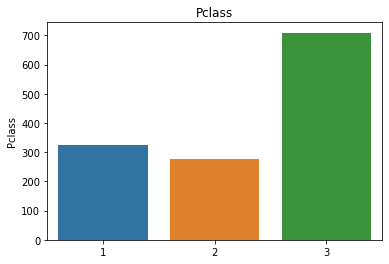

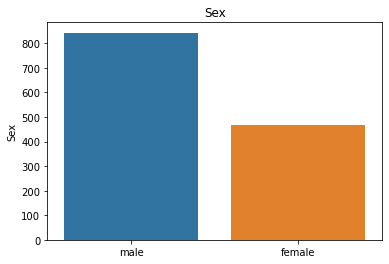

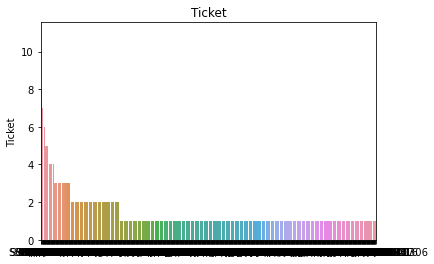

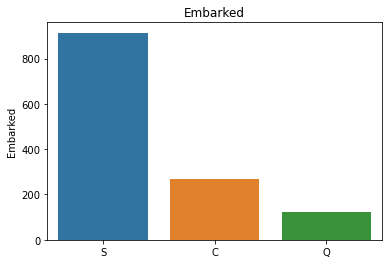

In [22]:
for i in data_cat.columns:
    sns.barplot(x=data_cat[i].value_counts().index,y=data_cat[i].value_counts()).set_title(i)
    plt.show()

## There are some unbalanced classes

In [23]:
## creating ticket with letters, and numeric ticket column
data['numeric_ticket'] = data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
data['ticket_letters'] = data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

In [24]:
data[['numeric_ticket']].value_counts()

numeric_ticket
1                 957
0                 352
dtype: int64

In [25]:
pd.pivot_table(data, values='Survived', columns=['numeric_ticket'])

numeric_ticket,0,1
Survived,0.382609,0.384266


In [26]:
table = pd.pivot_table(data, values='Survived', columns='ticket_letters').T.sort_values(by='Survived', ascending=False)

In [27]:
count = pd.DataFrame()
count['Ticket_Count'] = pd.DataFrame(data[['ticket_letters']].value_counts())

In [28]:
merged_data = pd.merge(table, count, left_index=True, right_on='ticket_letters')

In [29]:
merged_data

,Survived,Ticket_Count
ticket_letters,,
sc,1.000000,2
swpp,1.000000,2
scahbasle,1.000000,1
fcc,0.800000,9
pp,0.666667,4
pc,0.650000,92
scah,0.500000,4
ppp,0.500000,2
scparis,0.454545,19


## Since most of type of tickets have less than 1% of the total sample size, I chose to not consider it correlated with the target, even if there some classes with more than 50% Survival rate, those samples are too small to infer anything

In [30]:
# Looking for name titles

data['name_titles'] = data.Name.apply(lambda x: x.split('.')[0])

In [31]:
data['name_titles'] = data.name_titles.apply(lambda x: x.split(' ')[-1])

In [32]:
data['name_titles'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: name_titles, dtype: int64

## Since most of titles have less than 5% of the total sample size, I chose to not consider it correlated with the target.

## Creating Baseline models

Summary results:

Logistic Regression (79.4%)

Decision Tree (80.1%)

Random Forest (81.2%)

Xtreme Gradient Boosting (82.7%)

Support Vector Classifier (82.1%)

K Nearest Neighbor (80.0%)


In [33]:
train_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      889 non-null    object 
 11  Age_Rounded   714 non-null    float64
 12  Fare_Rounded  891 non-null    float64
dtypes: float64(4), int64(5), object(4)
memory usage: 90.6+ KB


## Pclass, SibSp, Parch and features are in the wrong data type, it could give to the model bias. (there are no order that you can infer for them)

## I will create a new categorical feature with Age, using the same idea of biases from Pclass, SibSp, Parch and features.

In [34]:
train_data_clean['Pclass'] = pd.DataFrame(train_data_clean['Pclass'].astype('object'))
test_data_clean['Pclass'] = pd.DataFrame(test_data_clean['Pclass'].astype('object'))
train_data_clean['Parch'] = pd.DataFrame(train_data_clean['Parch'].astype('object'))
test_data_clean['Parch'] = pd.DataFrame(test_data_clean['Parch'].astype('object'))

def categorize_age(age):
    if age < 18:
        return 'Kid'
    elif 18 <= age < 34:
        return 'Adult'
    elif 35 <= age <= 55:
        return 'Mature Adult'
    else:
        return 'Elder'

median_age = train_data_clean.Age.median()

train_data_clean['Age'].fillna(median_age,inplace=True)
test_data_clean['Age'].fillna(median_age,inplace=True)

median_Fare = train_data_clean.Fare.median()
test_data_clean['Fare'].fillna(median_Fare,inplace=True)

train_data_clean['Age_cat'] = train_data_clean['Age'].apply(categorize_age)
test_data_clean['Age_cat'] = test_data_clean['Age'].apply(categorize_age)

def categorize_sibsp(sibsp):
    if sibsp == 0:
        return 'NoSibSp'
    else:
        return 'WithSibSp'

def categorize_parch(sibsp):
    if sibsp == 0:
        return 'NoParch'
    else:
        return 'WithParch'


train_data_clean['Parch'] = train_data_clean['Parch'].apply(categorize_parch)
test_data_clean['Parch'] = test_data_clean['Parch'].apply(categorize_parch)

train_data_clean['SibSp'] = train_data_clean['SibSp'].apply(categorize_sibsp)
test_data_clean['SibSp'] = test_data_clean['SibSp'].apply(categorize_sibsp)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
from hyperopt import hp, tpe, fmin, Trials, space_eval
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.impute import SimpleImputer

In [36]:
x_train = train_data_clean.drop(columns=['Survived', 'Ticket','Age_Rounded','Name','PassengerId','Age','Fare_Rounded'])
y_train = train_data_clean['Survived']

In [37]:
x_test = test_data_clean.drop(columns=['Ticket','Name','PassengerId','Age'])


In [38]:
preprocessing = Pipeline([('scaler', StandardScaler())])
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)
x_train_pp = preprocessing.fit_transform(x_train)
x_test_pp = preprocessing.transform(x_test)

In [39]:
df=pd.DataFrame(x_train_pp)
df.isna().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [40]:
df=pd.DataFrame(x_test_pp)
df.isna().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [41]:
x_test_pp = preprocessing.fit_transform(x_test)

In [42]:
kf5= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [43]:
base_pipe_lr = Pipeline([('model', LogisticRegression())])

base_pipe_dt = Pipeline([('model', DecisionTreeClassifier())])

base_pipe_rf = Pipeline([('model', RandomForestClassifier())])

base_pipe_xgb = Pipeline([('model', xgb.XGBClassifier())])

base_pipe_svc = Pipeline([('model', SVC())])

base_pipe_knn = Pipeline([('model', KNeighborsClassifier())])

In [44]:
cv = cross_val_score(estimator=base_pipe_lr, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.79329609 0.79775281 0.80898876 0.76966292 0.80337079]
0.7946142740568702


In [45]:
cv = cross_val_score(estimator=base_pipe_dt, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.80446927 0.82022472 0.79775281 0.79213483 0.78651685]
0.8002196974452325


In [46]:
cv = cross_val_score(estimator=base_pipe_rf, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.80446927 0.79775281 0.80898876 0.8258427  0.83146067]
0.8137028435126483


In [47]:
cv = cross_val_score(estimator=base_pipe_xgb, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.82681564 0.8258427  0.82022472 0.83707865 0.8258427 ]
0.8271608813006088


In [48]:
cv = cross_val_score(estimator=base_pipe_svc, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.84357542 0.81460674 0.79775281 0.8258427  0.8258427 ]
0.8215240725629277


In [49]:
cv = cross_val_score(estimator=base_pipe_knn, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.78212291 0.83707865 0.76966292 0.8258427  0.78651685]
0.8002448057246877


## Tuning parameters using Bayesian optimization

In [50]:
hps_space_lr = {'C': hp.choice('C', np.arange(0.3, 1, 0.05)),
                'penalty': hp.choice('penalty',['l1','l2','elasticnet'])}

def obejctive_function_lr(hps_space): 
    pipe = Pipeline([('model', LogisticRegression(**hps_space))])

    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    resultado = cross_validate(pipe,
                           x_train_pp, y_train, 
                           cv=splitter,
                           scoring="accuracy",
                           n_jobs=-1
                           )

    avg_acc = resultado["test_score"].mean()
    
    return -avg_acc
trials = Trials()

best_hps_lr = fmin(obejctive_function_lr, # objective function
                   space=hps_space_lr, # parameter space
                   algo=tpe.suggest, # tpe to surrogate
                   trials=trials, # trials to register the history
                   rstate=np.random.default_rng(42), # randomseed
                   max_evals=100) # evaluation max number

100%|██████████| 100/100 [00:04<00:00, 20.56trial/s, best loss: -0.7946142740568702]


In [51]:
best_hps_lr = space_eval(hps_space_lr, best_hps_lr)

In [52]:
hps_space_dt = {'max_depth': hp.choice('max_depth', range(5, 25, 1)),
                'criterion': hp.choice('criterion',['gini','entropy'])}

def obejctive_function_dt(hps_space): 
    pipe = Pipeline([('model', DecisionTreeClassifier())])

    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    resultado = cross_validate(pipe,
                           x_train_pp, y_train, 
                           cv=splitter,
                           scoring="accuracy",
                           n_jobs=-1
                           )

    avg_acc = resultado["test_score"].mean()
    
    return -avg_acc
trials = Trials()

best_hps_dt = fmin(obejctive_function_dt,
                    space=hps_space_dt,
                    algo=tpe.suggest,
                    trials=trials,
                    rstate=np.random.default_rng(42),
                    max_evals=100)

100%|██████████| 100/100 [00:01<00:00, 74.96trial/s, best loss: -0.8080911430544221]


In [53]:
best_hps_dt = space_eval(hps_space_dt, best_hps_dt)

In [54]:
hps_space_rf = {'max_depth': hp.choice('max_depth', range(5, 25, 1)),
                'criterion': hp.choice('criterion',['gini','entropy']),
                'n_estimators': hp.choice('n_estimators',range(50, 300, 10))}

def obejctive_function_rf(hps_space): 
    pipe = Pipeline([('model', RandomForestClassifier())])

    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    resultado = cross_validate(pipe,
                           x_train_pp, y_train, 
                           cv=splitter,
                           scoring="accuracy",
                           n_jobs=-1
                           )

    avg_acc = resultado["test_score"].mean()
    
    return -avg_acc
trials = Trials()

best_hps_rf = fmin(obejctive_function_rf,
                    space=hps_space_rf,
                    algo=tpe.suggest,
                    trials=trials,
                    rstate=np.random.default_rng(42),
                    max_evals=100)

100%|██████████| 100/100 [00:19<00:00,  5.24trial/s, best loss: -0.8215491808423827]


In [55]:
best_hps_rf = space_eval(hps_space_rf, best_hps_rf)

In [56]:
hps_space_xgb = {'max_depth': hp.choice('max_depth', range(5, 25, 1)),
                 'gamma': hp.choice('gamma',np.arange(0, 50, 1)),
                 'eta': hp.choice('eta', np.arange(0, 1, 0.5))}

def obejctive_function_xgb(hps_space): 
    pipe = Pipeline([('model', xgb.XGBClassifier(booster='gbtree'))])

    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    resultado = cross_validate(pipe,
                           x_train_pp, y_train, 
                           cv=splitter,
                           scoring="accuracy",
                           n_jobs=-1
                           )

    avg_acc = resultado["test_score"].mean()
    
    return -avg_acc
trials = Trials()

best_hps_xgb = fmin(obejctive_function_xgb,
                    space=hps_space_xgb,
                    algo=tpe.suggest,
                    trials=trials,
                    rstate=np.random.default_rng(42),
                    max_evals=100)

100%|██████████| 100/100 [00:09<00:00, 10.19trial/s, best loss: -0.8271608813006088]


In [57]:
best_hps_xgb = space_eval(hps_space_xgb, best_hps_xgb)

In [58]:
hps_space_svc = {'C': hp.choice('C', np.arange(0.3, 1, 0.05)),
                 'kernel': hp.choice('kernel',['poly','linear','rbf','sigmoid','precomputed']),
                 'degree': hp.choice('degree', range(2,8,1))}

def obejctive_function_svc(hps_space): 
    pipe = Pipeline([('model', SVC())])

    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    resultado = cross_validate(pipe,
                           x_train_pp, y_train, 
                           cv=splitter,
                           scoring="accuracy",
                           n_jobs=-1
                           )

    avg_acc = resultado["test_score"].mean()
    
    return -avg_acc
trials = Trials()

best_hps_svc = fmin(obejctive_function_svc,
                    space=hps_space_svc,
                    algo=tpe.suggest,
                    trials=trials,
                    rstate=np.random.default_rng(42),
                    max_evals=100)

100%|██████████| 100/100 [00:03<00:00, 26.05trial/s, best loss: -0.8215240725629277]


In [59]:
best_hps_svc = space_eval(hps_space_svc, best_hps_svc)

In [60]:
hps_space_knn = {'n_neighbors': hp.choice('n_neighbors', range(5, 25, 1)),
                 'weights': hp.choice('weights',['uniform','distance']),
                 'algorithm': hp.choice('algorithm',['brute']),
                 'metric': hp.choice('metric',['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity'])}

def obejctive_function_knn(hps_space): 
    pipe = Pipeline([('model', KNeighborsClassifier())])

    splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    resultado = cross_validate(pipe,
                           x_train_pp, y_train, 
                           cv=splitter,
                           scoring="accuracy",
                           n_jobs=-1
                           )

    avg_acc = resultado["test_score"].mean()
    
    return -avg_acc
trials = Trials()

best_hps_knn = fmin(obejctive_function_knn,
                    space=hps_space_knn,
                    algo=tpe.suggest,
                    trials=trials,
                    rstate=np.random.default_rng(42),
                    max_evals=100)

100%|██████████| 100/100 [00:02<00:00, 44.21trial/s, best loss: -0.8002448057246877]


In [61]:
best_hps_knn = space_eval(hps_space_knn, best_hps_knn)

In [62]:
best_hps_lr

{'C': 0.5499999999999999, 'penalty': 'l2'}

In [63]:
best_hps_dt

{'criterion': 'entropy', 'max_depth': 14}

In [64]:
best_hps_rf

{'criterion': 'gini', 'max_depth': 14, 'n_estimators': 140}

In [65]:
best_hps_xgb

{'eta': 0.5, 'gamma': 40, 'max_depth': 5}

In [66]:
best_hps_svc

{'C': 0.7499999999999999, 'degree': 6, 'kernel': 'poly'}

In [67]:
best_hps_knn

{'algorithm': 'brute',
 'metric': 'cityblock',
 'n_neighbors': 21,
 'weights': 'uniform'}

In [68]:
base_pipe_lr = Pipeline([('model', LogisticRegression(**best_hps_lr))])

base_pipe_dt = Pipeline([('model', DecisionTreeClassifier(**best_hps_dt))])

base_pipe_rf = Pipeline([('model', RandomForestClassifier(**best_hps_rf))])

base_pipe_xgb = Pipeline([('model', xgb.XGBClassifier(**best_hps_xgb))])

base_pipe_svc = Pipeline([('model', SVC(**best_hps_svc, probability=True))])

base_pipe_knn = Pipeline([('model', KNeighborsClassifier(**best_hps_knn))])

In [69]:
cv = cross_val_score(estimator=base_pipe_lr, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.79329609 0.79775281 0.80898876 0.76966292 0.80337079]
0.7946142740568702


In [70]:
cv = cross_val_score(estimator=base_pipe_dt, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.79888268 0.81460674 0.79775281 0.80898876 0.78651685]
0.8013495700207143


In [71]:
cv = cross_val_score(estimator=base_pipe_rf, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.81564246 0.82022472 0.80337079 0.8258427  0.83146067]
0.8193082669010107


In [72]:
cv = cross_val_score(estimator=base_pipe_xgb, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.7877095  0.7752809  0.78651685 0.76404494 0.82022472]
0.7867553825874082


In [73]:
cv = cross_val_score(estimator=base_pipe_svc, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.78212291 0.80337079 0.78651685 0.80337079 0.82022472]
0.7991212102190698


In [74]:
cv = cross_val_score(estimator=base_pipe_knn, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.75418994 0.79213483 0.78089888 0.78089888 0.79213483]
0.780051471972883


## Ensemble

In [75]:
from sklearn.ensemble import VotingClassifier

ensemble_all = VotingClassifier([('rf',base_pipe_rf),
                                 ('lr',base_pipe_lr),     
                                 ('knn',base_pipe_knn),
                                 ('xgb',base_pipe_xgb),                               
                                 ('dt',base_pipe_dt),                           
                                 ('svc',base_pipe_svc)]
                                 ,voting='soft')

In [76]:
cv = cross_val_score(estimator=ensemble_all, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.83240223 0.85393258 0.80898876 0.8258427  0.8258427 ]
0.8294017952419811


In [77]:
ensemble_all_hard = VotingClassifier([('rf',base_pipe_rf),
                                      ('lr',base_pipe_lr),     
                                      ('knn',base_pipe_knn),
                                      ('xgb',base_pipe_xgb),                               
                                      ('dt',base_pipe_dt),                           
                                      ('svc',base_pipe_svc)],voting='hard')

In [78]:
cv = cross_val_score(estimator=ensemble_all_hard, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.82681564 0.83707865 0.80898876 0.83707865 0.8258427 ]
0.8271608813006088


In [79]:
ensemble_all_best = VotingClassifier([('rf',base_pipe_rf),
                                      ('lr',base_pipe_lr),                                   
                                      ('dt',base_pipe_dt),                           
                                      ('svc',base_pipe_svc)]
                                      ,voting='soft')

In [80]:
cv = cross_val_score(estimator=ensemble_all_best, X=x_train_pp, y=y_train, cv=kf5)
print(cv)
print(cv.mean())

[0.83240223 0.84831461 0.80898876 0.84269663 0.81460674]
0.8294017952419811


In [81]:
ensemble_all.fit(x_train_pp,y_train)

VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('model',
                                               RandomForestClassifier(max_depth=14,
                                                                      n_estimators=140))])),
                             ('lr',
                              Pipeline(steps=[('model',
                                               LogisticRegression(C=0.5499999999999999))])),
                             ('knn',
                              Pipeline(steps=[('model',
                                               KNeighborsClassifier(algorithm='brute',
                                                                    metric='cityblock',
                                                                    n_neighbors=21))])),
                             ('xgb',
                              Pipeline(steps=[('model',
                                               XGBClassifier(...
                               

## Ensemble results
soft voting + every model (82.7%)

hard voting + every model (82.1%)

soft voting + without svc and xgboost (82.9%)



## The best model was the ensemble with soft voting without svc and xgboost, scoring 82.9% of right predictions

In [82]:
y_hat_ensemble = ensemble_all.predict(x_test_pp)

results_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': y_hat_ensemble 
})

results_df.to_csv('submission.csv', index=False)

In [83]:
y_hat_ensemble

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,